# Regresión Logística

##### La Organización Mundial de la Salud ha estimado que 12 millones de muertes ocurren en todo el mundo, cada año debido a enfermedades del corazón.
- El pronóstico temprano de las enfermedades cardiovasculares puede ayudar a tomar decisiones sobre los cambios en el estilo de vida.
- El dataset fue obtenido de un estudio cardiovascular que se hizo en la ciudad Framingham, Massachusetts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [2]:
heartd = pd.read_csv('framingham.csv')

#### Features
- Age: Edad
- Male: sexo
- Education: Educación
- Current Smoker: Si fuma o no
- CigsPerDay: La cantidad de cigarrillos que una persona fuma en promedio en un día.
- BP Meds: Si el paciente estaba tomando medicamentos para la presión arterial.
- PrevalentStroke: Si el paciente había tenido o no derrame cerebral.
- prevalentHyp: Si el paciente era o no hipertenso.
- diabetes: diabetes
- totChol: Nivel de colesterol
- sysBP: Presión arterial (systolic)
- DiaBP: presión arterial (diastólica)
- BMI: Indice de masa corporal (Body Mass Index)
- heartRate: Frecuencia cardíaca
- glucose: Glucosa
- TenYearCHD: 10 años de riesgo de enfermedad coronaria (Coronary Heart Disease)

In [ ]:
#heartd[100:140]
#index = heartd['cigsPerDay'].index[heartd['cigsPerDay'].apply(np.isnan)]
#index

In [4]:
heartd.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
mask = (heartd['education'] != 'NaN')
avg_filler = heartd.loc[mask, 'education'].mean()
heartd.loc[heartd['education'].isnull() & mask, 'education'] = avg_filler

/home/gcc/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
#cigsPerDay
mask1 = (heartd['cigsPerDay'] != 'NaN')
avg_filler1 = heartd.loc[mask1, 'cigsPerDay'].mean()
heartd.loc[heartd['cigsPerDay'].isnull() & mask1, 'cigsPerDay'] = avg_filler1

In [7]:
#BPMeds
mask2 = (heartd['BPMeds'] != 'NaN')
avg_filler2 = heartd.loc[mask2, 'BPMeds'].mean()
heartd.loc[heartd['BPMeds'].isnull() & mask2, 'BPMeds'] = avg_filler2

In [8]:
#totChol
mask3 = (heartd['totChol'] != 'NaN')
avg_filler3 = heartd.loc[mask3, 'totChol'].mean()
heartd.loc[heartd['totChol'].isnull() & mask3, 'totChol'] = avg_filler3

In [9]:
#BMI
mask4 = (heartd['BMI'] != 'NaN')
avg_filler4 = heartd.loc[mask4, 'BMI'].mean()
heartd.loc[heartd['BMI'].isnull() & mask4, 'BMI'] = avg_filler4

In [10]:
#glucose
mask5 = (heartd['glucose'] != 'NaN')
avg_filler5 = heartd.loc[mask5, 'glucose'].mean()
heartd.loc[heartd['glucose'].isnull() & mask5, 'glucose'] = avg_filler5

In [11]:
heartd.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
heartd.head(40)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      1   39    4.00000              0         0.0     0.0                0   
1      0   46    2.00000              0         0.0     0.0                0   
2      1   48    1.00000              1        20.0     0.0                0   
3      0   61    3.00000              1        30.0     0.0                0   
4      0   46    3.00000              1        23.0     0.0                0   
5      0   43    2.00000              0         0.0     0.0                0   
6      0   63    1.00000              0         0.0     0.0                0   
7      0   45    2.00000              1        20.0     0.0                0   
8      1   52    1.00000              0         0.0     0.0                0   
9      1   43    1.00000              1        30.0     0.0                0   
10     0   50    1.00000              0         0.0     0.0                0   
11     0   43    2.00000              0         0.0     0.0                0   
12     1   46    1.00000              1        15.0     0.0                0   
13     0   41    3.00000              0         0.0     1.0                0   
14     0   39    2.00000              1         9.0     0.0                0   
15     0   38    2.00000              1        20.0     0.0                0   
16     1   48    3.00000              1        10.0     0.0                0   
17     0   46    2.00000              1        20.0     0.0                0   
18     0   38    2.00000              1         5.0     0.0                0   
19     1   41    2.00000              0         0.0     0.0                0   
20     0   42    2.00000              1        30.0     0.0                0   
21     0   43    1.00000              0         0.0     0.0                0   
22     0   52    1.00000              0         0.0     0.0                0   
23     0   52    3.00000              1        20.0     0.0                0   
24     1   44    2.00000              1        30.0     0.0                0   
25     1   47    4.00000              1        20.0     0.0                0   
26     0   60    1.00000              0         0.0     0.0                0   
27     1   35    2.00000              1        20.0     0.0                0   
28     0   61    3.00000              0         0.0     0.0                0   
29     0   60    1.00000              0         0.0     0.0                0   
30     1   36    4.00000              1        35.0     0.0                0   
31     1   43    4.00000              1        43.0     0.0                0   
32     0   59    1.00000              0         0.0     0.0                0   
33     1   61    1.97895              1         5.0     0.0                0   
34     1   54    1.00000              1        20.0     0.0                0   
35     1   37    2.00000              0         0.0     0.0                0   
36     1   56    1.97895              0         0.0     0.0                0   
37     1   52    1.00000              0         0.0     0.0                0   
38     0   42    1.00000              1         1.0     0.0                0   
39     1   36    3.00000              0         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0              0         0    195.0  106.0   70.0  26.97       80.0   
1              0         0    250.0  121.0   81.0  28.73       95.0   
2              0         0    245.0  127.5   80.0  25.34       75.0   
3              1         0    225.0  150.0   95.0  28.58       65.0   
4              0         0    285.0  130.0   84.0  23.10       85.0   
5              1         0    228.0  180.0  110.0  30.30       77.0   
6              0         0    205.0  138.0   71.0  33.11       60.0   
7              0         0    313.0  100.0   71.0  21.68       79.0   
8              1         0    260.0  141.5   89.0  26.36       76.0   
9            

In [ ]:
#heartd.dropna(axis=0,inplace=True)

In [13]:
#heartd.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [37]:
heartd.describe()

male          age    education   cigsPerDay       BPMeds  \
count  4237.000000  4237.000000  4237.000000  4237.000000  4237.000000   
mean      0.429077    49.581544     1.979181     9.000965     0.029637   
std       0.495003     8.570310     1.007082    11.879828     0.168539   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%       0.000000    42.000000     1.000000     0.000000     0.000000   
50%       0.000000    49.000000     2.000000     0.000000     0.000000   
75%       1.000000    56.000000     3.000000    20.000000     0.000000   
max       1.000000    70.000000     4.000000    70.000000     1.000000   

           totChol        sysBP          BMI    heartRate      glucose  \
count  4237.000000  4237.000000  4237.000000  4237.000000  4237.000000   
mean    236.725768   132.342931    25.801184    75.878924    81.964621   
std      44.330848    22.032062     4.071080    12.026596    22.838877   
min     107.000000    83.500000    15.540000    44.000000    40.000000   
25%     206.000000   117.000000    23.080000    68.000000    72.000000   
50%     234.000000   128.000000    25.410000    75.000000    80.000000   
75%     262.000000   144.000000    28.030000    83.000000    85.000000   
max     696.000000   295.000000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4237.000000  
mean      0.151758  
std       0.358829  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [38]:
corr

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017126       0.197596    0.316807   
age             -0.028979  1.000000  -0.163613      -0.213748   -0.192366   
education        0.017126 -0.163613   1.000000       0.018301    0.007962   
currentSmoker    0.197596 -0.213748   0.018301       1.000000    0.766970   
cigsPerDay       0.316807 -0.192366   0.007962       0.766970    1.000000   
BPMeds          -0.052204  0.121980  -0.010607      -0.048632   -0.045826   
prevalentStroke -0.004546  0.057655  -0.035110      -0.032988   -0.032706   
prevalentHyp     0.005313  0.307194  -0.080993      -0.103260   -0.065947   
diabetes         0.015708  0.101258  -0.038146      -0.044295   -0.037063   
totChol         -0.069974  0.260270  -0.022507      -0.046285   -0.026025   
sysBP           -0.035989  0.394302  -0.128260      -0.130230   -0.088505   
diaBP            0.057933  0.206104  -0.061755      -0.107746   -0.056391   
BMI              0.081506  0.135283  -0.135635      -0.167276   -0.092453   
heartRate       -0.116620 -0.012823  -0.053632       0.062356    0.074856   
glucose          0.005818  0.116850  -0.033721      -0.054157   -0.056088   
TenYearCHD       0.088428  0.225256  -0.053384       0.019456    0.057775   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052204        -0.004546      0.005313  0.015708 -0.069974   
age              0.121980         0.057655      0.307194  0.101258  0.260270   
education       -0.010607        -0.035110     -0.080993 -0.038146 -0.022507   
currentSmoker   -0.048632        -0.032988     -0.103260 -0.044295 -0.046285   
cigsPerDay      -0.045826        -0.032706     -0.065947 -0.037063 -0.026025   
BPMeds           1.000000         0.115003      0.259243  0.051571  0.078909   
prevalentStroke  0.115003         1.000000      0.074830  0.006949  0.000067   
prevalentHyp     0.259243         0.074830      1.000000  0.077808  0.163041   
diabetes         0.051571         0.006949      0.077808  1.000000  0.040092   
totChol          0.078909         0.000067      0.163041  0.040092  1.000000   
sysBP            0.252047         0.057009      0.696755  0.111283  0.207609   
diaBP            0.192490         0.045190      0.615751  0.050329  0.163903   
BMI              0.099552         0.024840      0.300572  0.086250  0.114789   
heartRate        0.015175        -0.017676      0.147261  0.048994  0.090677   
glucose          0.048905         0.018055      0.082924  0.605705  0.044583   
TenYearCHD       0.086774         0.061810      0.177603  0.097317  0.081624   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035989  0.057933  0.081506  -0.116620  0.005818    0.088428  
age              0.394302  0.206104  0.135283  -0.012823  0.116850    0.225256  
education       -0.128260 -0.061755 -0.135635  -0.053632 -0.033721   -0.053384  
currentSmoker   -0.130230 -0.107746 -0.167276   0.062356 -0.054157    0.019456  
cigsPerDay      -0.088505 -0.056391 -0.092453   0.074856 -0.056088    0.057775  
BPMeds           0.252047  0.192490  0.099552   0.015175  0.048905    0.086774  
prevalentStroke  0.057009  0.045190  0.024840  -0.017676  0.018055    0.061810  
prevalentHyp     0.696755  0.615751  0.300572   0.147261  0.082924    0.177603  
diabetes         0.111283  0.050329  0.086250   0.048994  0.605705    0.097317  
totChol          0.207609  0.163903  0.114789   0.090677  0.044583    0.081624  
sysBP            1.000000  0.784002  0.325247   0.182246  0.134608    0.216429  
diaBP            0.784002  1.000000  0.376544   0.181255  0.058647    0.145299  
BMI              0.325247  0.376544  1.000000   0.067550  0.082109    0.074680  
heartRate        0.182246  0.181255  0.067550   1.000000  0.089343    0.022913  
glucose          0.134608  0.058647  0.082109   0.089343  1.000000    0.120406  
TenYearCHD       0.216429  0.145299  0.074680   0.0229

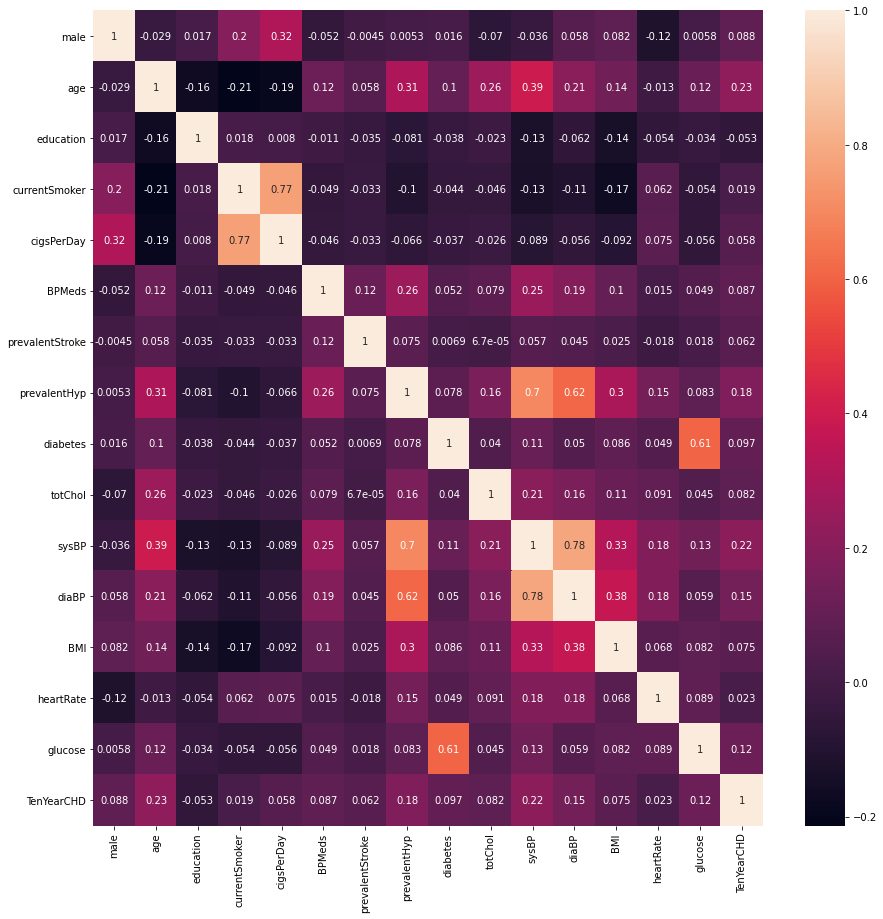

In [15]:
f, ax = plt.subplots(figsize=(15, 15))
corr = heartd.corr()
sns.heatmap(corr, annot=True)

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017126       0.197596    0.316807   
age             -0.028979  1.000000  -0.163613      -0.213748   -0.192366   
education        0.017126 -0.163613   1.000000       0.018301    0.007962   
currentSmoker    0.197596 -0.213748   0.018301       1.000000    0.766970   
cigsPerDay       0.316807 -0.192366   0.007962       0.766970    1.000000   
BPMeds          -0.052204  0.121980  -0.010607      -0.048632   -0.045826   
prevalentStroke -0.004546  0.057655  -0.035110      -0.032988   -0.032706   
prevalentHyp     0.005313  0.307194  -0.080993      -0.103260   -0.065947   
diabetes         0.015708  0.101258  -0.038146      -0.044295   -0.037063   
totChol         -0.069974  0.260270  -0.022507      -0.046285   -0.026025   
sysBP           -0.035989  0.394302  -0.128260      -0.130230   -0.088505   
diaBP            0.057933  0.206104  -0.061755      -0.107746   -0.056391   
BMI              0.081506  0.135283  -0.135635      -0.167276   -0.092453   
heartRate       -0.116620 -0.012823  -0.053632       0.062356    0.074856   
glucose          0.005818  0.116850  -0.033721      -0.054157   -0.056088   
TenYearCHD       0.088428  0.225256  -0.053384       0.019456    0.057775   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052204        -0.004546      0.005313  0.015708 -0.069974   
age              0.121980         0.057655      0.307194  0.101258  0.260270   
education       -0.010607        -0.035110     -0.080993 -0.038146 -0.022507   
currentSmoker   -0.048632        -0.032988     -0.103260 -0.044295 -0.046285   
cigsPerDay      -0.045826        -0.032706     -0.065947 -0.037063 -0.026025   
BPMeds           1.000000         0.115003      0.259243  0.051571  0.078909   
prevalentStroke  0.115003         1.000000      0.074830  0.006949  0.000067   
prevalentHyp     0.259243         0.074830      1.000000  0.077808  0.163041   
diabetes         0.051571         0.006949      0.077808  1.000000  0.040092   
totChol          0.078909         0.000067      0.163041  0.040092  1.000000   
sysBP            0.252047         0.057009      0.696755  0.111283  0.207609   
diaBP            0.192490         0.045190      0.615751  0.050329  0.163903   
BMI              0.099552         0.024840      0.300572  0.086250  0.114789   
heartRate        0.015175        -0.017676      0.147261  0.048994  0.090677   
glucose          0.048905         0.018055      0.082924  0.605705  0.044583   
TenYearCHD       0.086774         0.061810      0.177603  0.097317  0.081624   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035989  0.057933  0.081506  -0.116620  0.005818    0.088428  
age              0.394302  0.206104  0.135283  -0.012823  0.116850    0.225256  
education       -0.128260 -0.061755 -0.135635  -0.053632 -0.033721   -0.053384  
currentSmoker   -0.130230 -0.107746 -0.167276   0.062356 -0.054157    0.019456  
cigsPerDay      -0.088505 -0.056391 -0.092453   0.074856 -0.056088    0.057775  
BPMeds           0.252047  0.192490  0.099552   0.015175  0.048905    0.086774  
prevalentStroke  0.057009  0.045190  0.024840  -0.017676  0.018055    0.061810  
prevalentHyp     0.696755  0.615751  0.300572   0.147261  0.082924    0.177603  
diabetes         0.111283  0.050329  0.086250   0.048994  0.605705    0.097317  
totChol          0.207609  0.163903  0.114789   0.090677  0.044583    0.081624  
sysBP            1.000000  0.784002  0.325247   0.182246  0.134608    0.216429  
diaBP            0.784002  1.000000  0.376544   0.181255  0.058647    0.145299  
BMI              0.325247  0.376544  1.000000   0.067550  0.082109    0.074680  
heartRate        0.182246  0.181255  0.067550   1.000000  0.089343    0.022913  
glucose          0.134608  0.058647  0.082109   0.089343  1.000000    0.120406  
TenYearCHD       0.216429  0.145299  0.074680   0.0229

### La correlación entre sysBP y diaBP son similares.
#### Correlación alta
- cigsPerDay y CurrentSmoker
- sysBP y diaBP
#### Correlación Media
- glucose y diabetes
- SysBP y prevalentStroke
- diaBP y prevalenHyp
#### Correlación Baja
- male y heartRate

In [24]:
#del heartd['nombreColumna']
del heartd['currentSmoker']
del heartd['diaBP']
del heartd['diabetes']
del heartd['prevalentStroke']
del heartd['prevalentHyp']

KeyError: 'currentSmoker'

In [25]:
heartd.head(5)

male  age  education  cigsPerDay  BPMeds  totChol  sysBP    BMI  heartRate  \
0     1   39        4.0         0.0     0.0    195.0  106.0  26.97       80.0   
1     0   46        2.0         0.0     0.0    250.0  121.0  28.73       95.0   
2     1   48        1.0        20.0     0.0    245.0  127.5  25.34       75.0   
3     0   61        3.0        30.0     0.0    225.0  150.0  28.58       65.0   
4     0   46        3.0        23.0     0.0    285.0  130.0  23.10       85.0   

   glucose  TenYearCHD  
0     77.0           0  
1     76.0           0  
2     70.0           0  
3    103.0           1  
4     85.0           0

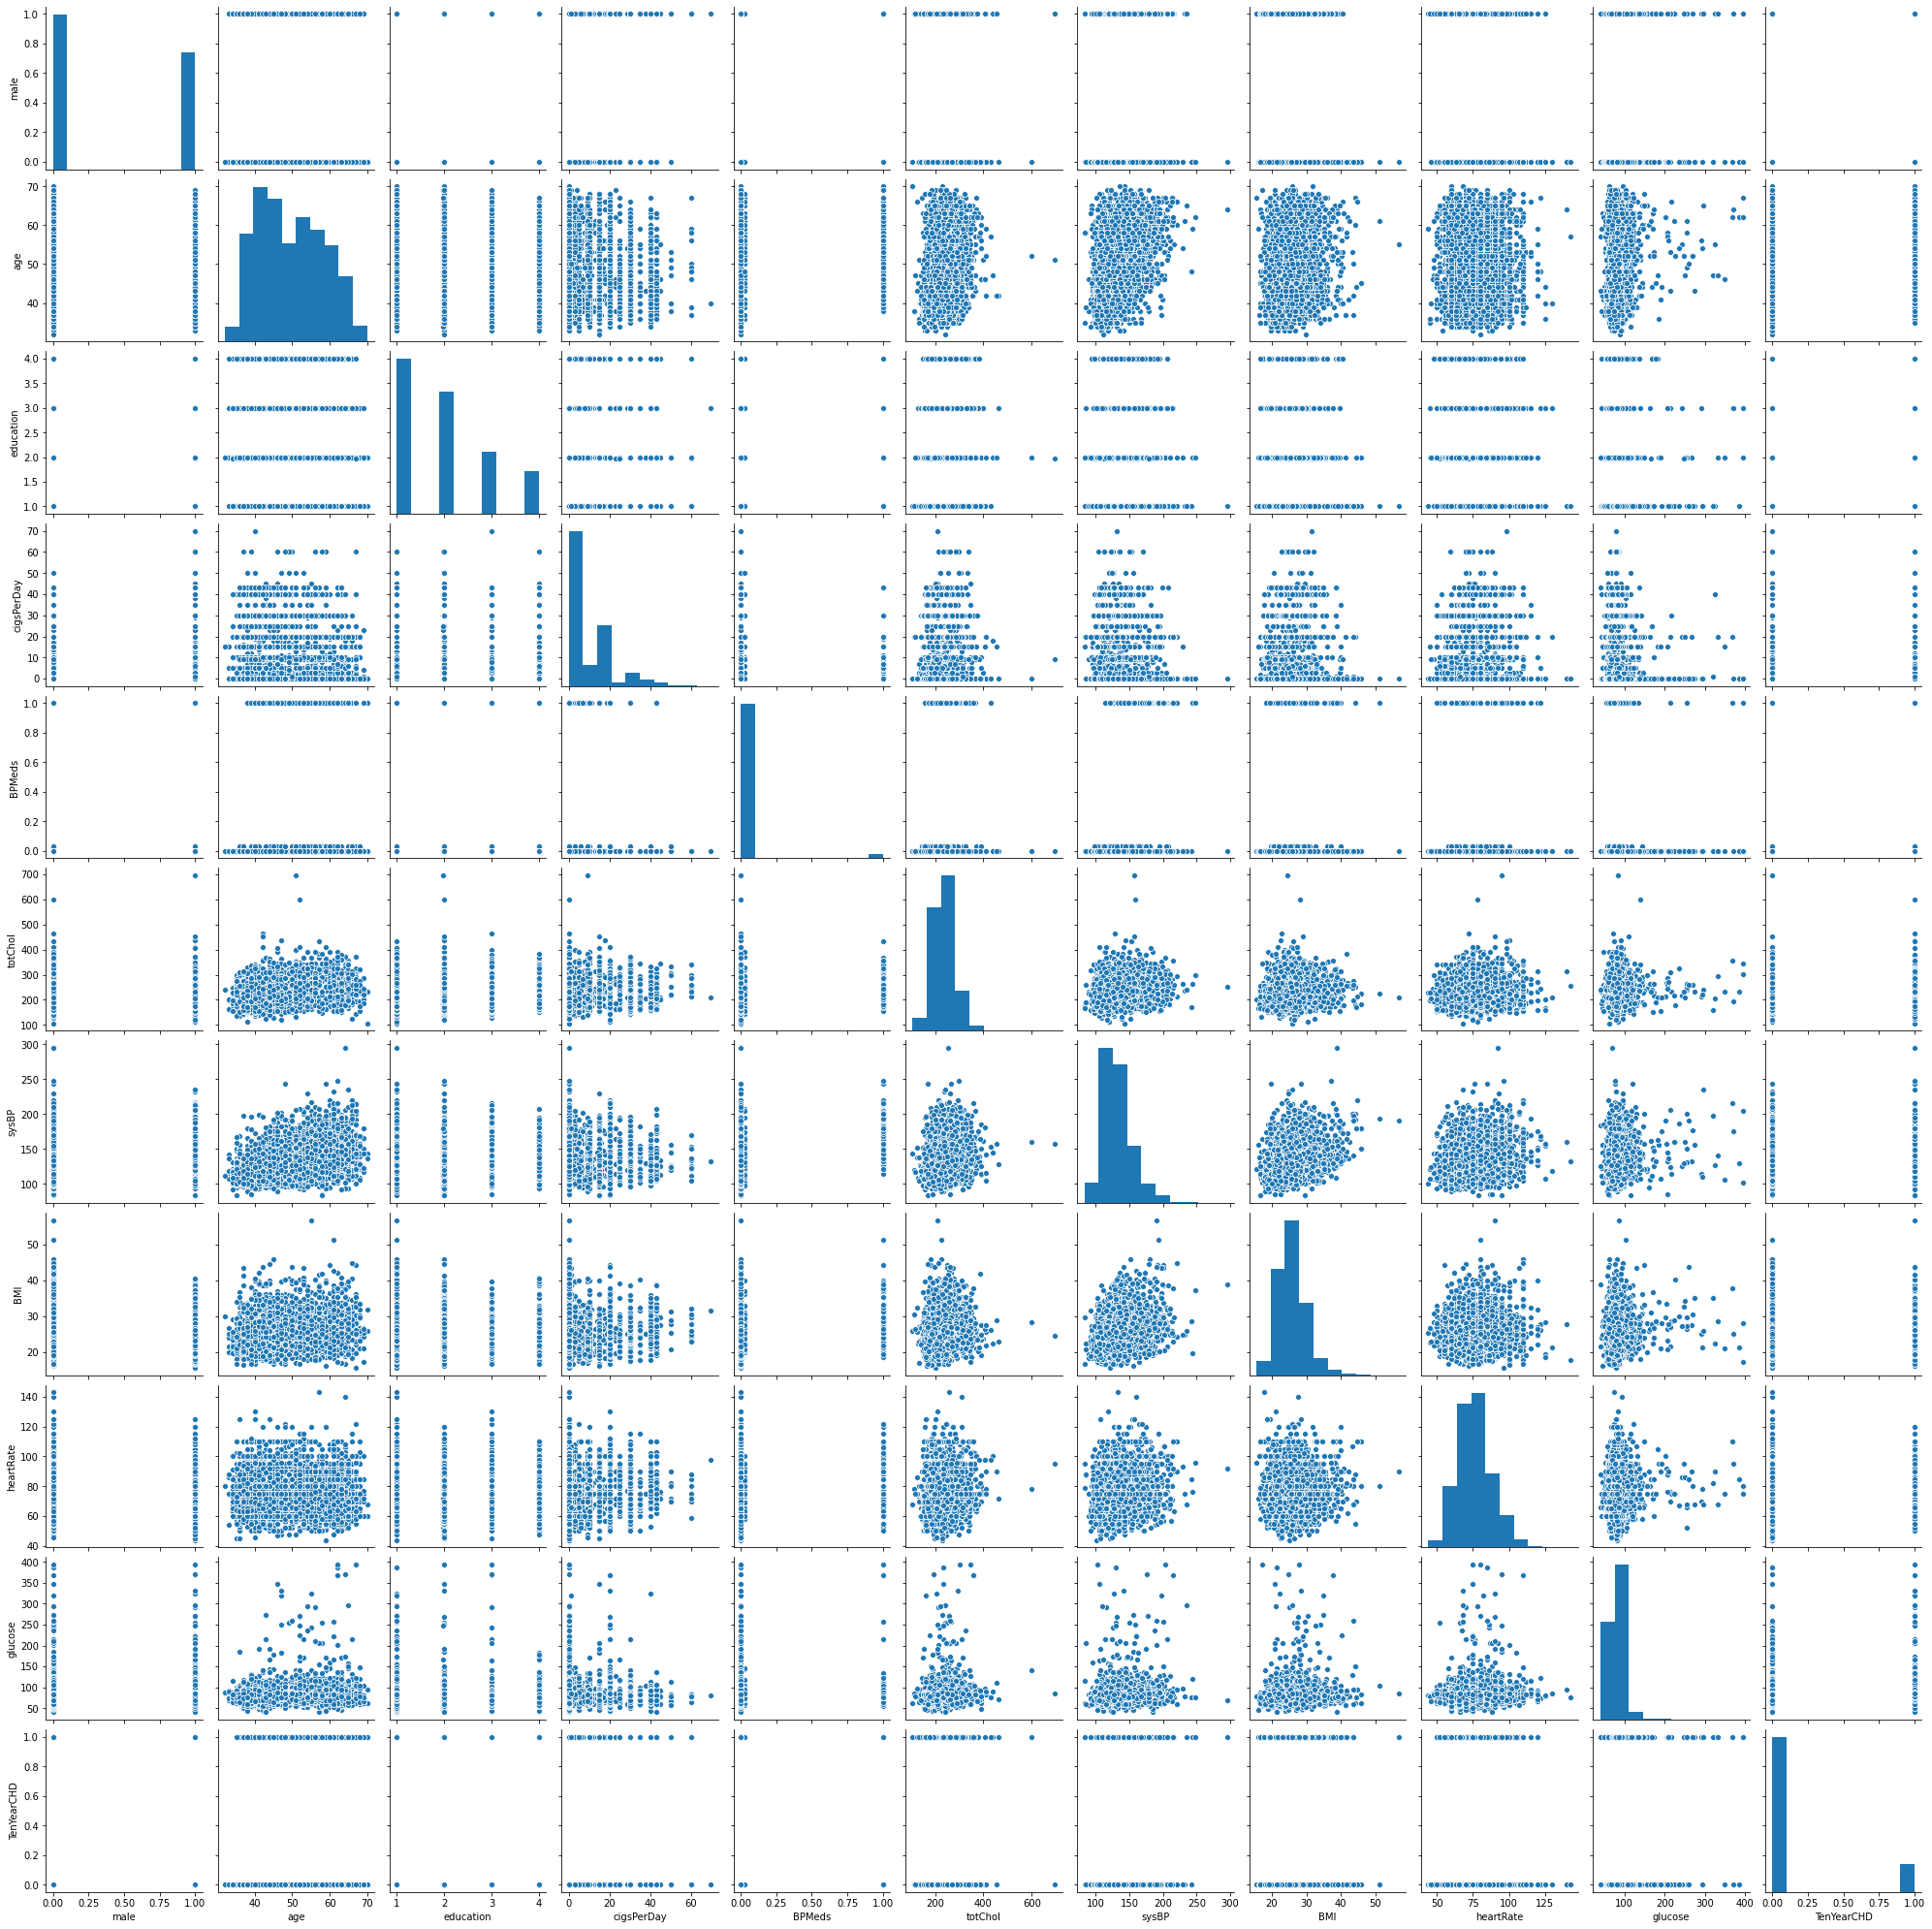

In [19]:
g = sns.pairplot(heartd)
g

In [29]:
heartd.dropna(axis=0,inplace=True)

In [30]:
heartd.isnull().sum()

male          0
age           0
education     0
cigsPerDay    0
BPMeds        0
totChol       0
sysBP         0
BMI           0
heartRate     0
glucose       0
TenYearCHD    0
dtype: int64

In [31]:
#male, BPMeds, prevalentHyp
nheartd=heartd[['age','cigsPerDay','totChol','sysBP','BMI','heartRate','glucose','TenYearCHD']]
x=nheartd.iloc[:,:-1] # todas las columnas menos 'TenYearCHD'
y=nheartd.iloc[:,-1] # Columna 'TenYearCHD'
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [32]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

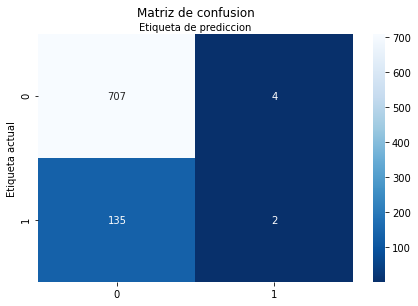

In [34]:
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion',y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

In [35]:
metrics.accuracy_score(y_test,y_pred)

0.8360849056603774

In [36]:
heartd.shape

(4237, 11)